# Credit Scoring

## <font color=blue>Goal:</font>
Building a model to evaluate a credit score for an applicant. 

## <font color=blue>Data Overview:</font>
This dataset contains 150k entries and 11 columns.<br>
It takes a memory usage of 12.6M Bytes.<br>
The 'SeriousDlqin2yrs' is the classification label column for a logistic model. Then the raw continuous output value of this logistic model will be rescaled to a credit score.<br>

## <font color=blue>Phase 1: Preproccess:</font>

### <font color=blue>Package Loading and Data Reading</font>
Only the most frequently used pakages are loaded hear. Other packages will be loaded before they are invoked.

In [1]:
import numpy as np
np.seterr(all='ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# define a function to display a sentence box.
# parameters:
# s: the sentence
# number: the number of stars in each line to draw the box, default value is 40
def Separate(s, number=40):
    print()
    print('*'*40)
    print(s)
    print('*'*40)

Separate('Prepare for data reading.')


****************************************
Prepare for data reading.
****************************************


In [2]:
df_origin = pd.read_csv('Credit_Score.csv')
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [3]:
df_miss = df_origin[df_origin.isnull().any(axis=1)]
df_miss.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
6,0,0.305682,57,0,5710.0,NaN,8,0,3,0,0.0
8,0,0.116951,27,0,46.0,NaN,2,0,0,0,NaN
16,0,0.061086,78,0,2058.0,NaN,10,0,2,0,0.0
32,0,0.083418,62,0,977.0,NaN,6,0,1,0,0.0
41,0,0.072898,81,0,75.0,NaN,7,0,0,0,0.0


### <font color=blue>Fill missing values</font>
The RandomForesetRegressor from sklear.ensemble is used to fill in missing values in the 'MonthlyIncome' column. <br>
Intuitively, 'MonthlyIncome' is important to Credit Score. It pays to restore as much information as possible. <br>

In [4]:
# get a list of column(s) with missing values, and get an other list of columns without missing value.
cols_missing = (list)(df_origin.columns[df_origin.isnull().any()])
cols_nomissing = (list)(df_origin.columns[~df_origin.isnull().any()])
print('Column name with missing data:{}'.format(cols_missing))
print('Column name without missing data:{}'.format(cols_nomissing))

Column name with missing data:['MonthlyIncome', 'NumberOfDependents']
Column name without missing data:['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse']


In [5]:
from sklearn.ensemble import RandomForestRegressor

# define a function to fill in missing data by existing data
# parameters:
# df: dataframe to be processed
# target_col: the column to be filled in
# no_missing_cols: all the columns without missing values
# return value:
# df_filled: a filled datafram
def fill_missing(df, target_col, no_missing_cols):
    target_miss = df[target_col].isnull()
    df_known = df.loc[~target_miss,:]
    df_unknown = df.loc[target_miss,:]
    
    X_train = df_known.loc[:,no_missing_cols]
    y_train = df_known.loc[:,target_col]
    
    rfr = RandomForestRegressor(random_state=0, n_estimators=200,max_depth=3,n_jobs=-1)
    rfr.fit(X_train,y_train)
    
    pred = rfr.predict(df_unknown.loc[:,no_missing_cols]).round(0)
    df.loc[target_miss,target_col] = pred
    return df
        
df_fill = df_origin.copy()
df_fill = fill_missing(df_fill, 'MonthlyIncome', cols_nomissing)
df_fill = fill_missing(df_fill, 'NumberOfDependents', cols_nomissing)
df_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         150000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    150000 non-null  float64
dtype

<font color=red>The above 'fill_missing' function can be reused in other cases with some minor parameter modifications.<br>
And other regressors can be tried in the function body.
</font>

### <font color=blue>Process Outliers</font>

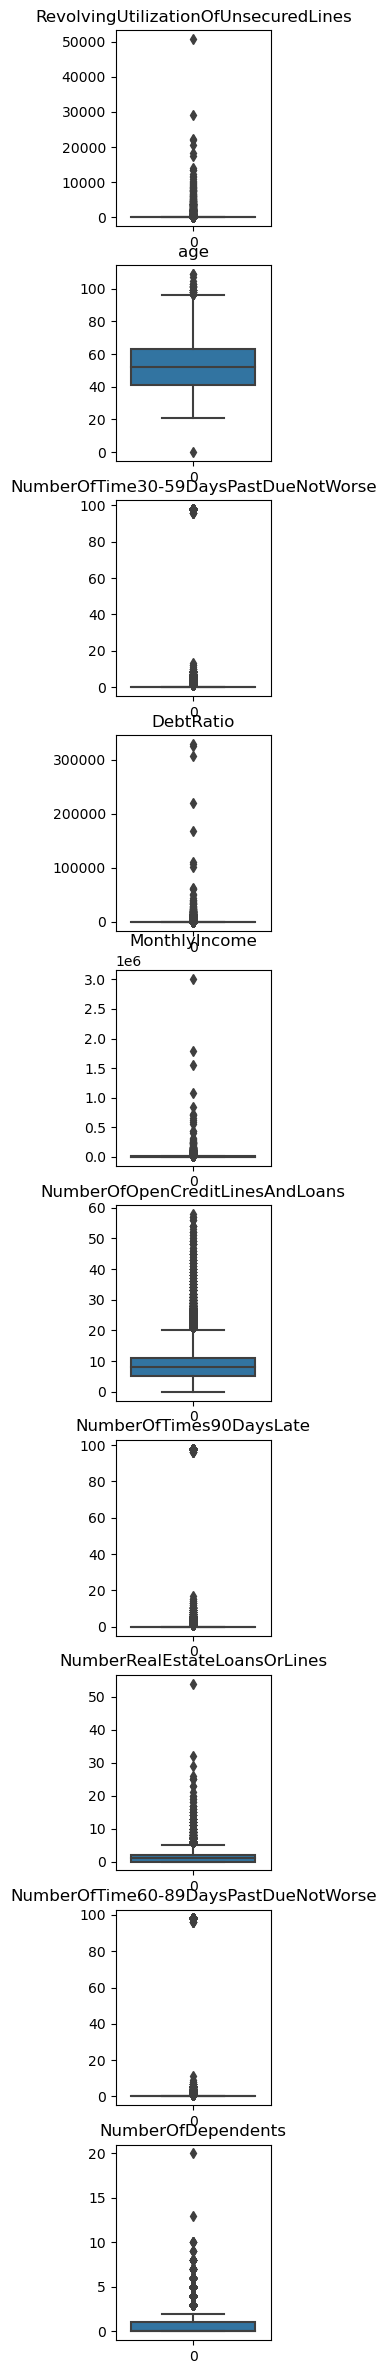

In [6]:
# check the quantiles of each attributes.
list_attr = list(df_fill.columns)
list_attr.remove('SeriousDlqin2yrs')

fig, axes = plt.subplots(len(list_attr),1, figsize=(2,30))
r0=0

for col in list_attr:
    sns.boxplot(data =df_fill[col],ax=axes[r0]).set(title=col)
    r0=r0+1   

<span style="color:#009999">
According to these graphs, each column requires outlier processing.
</span>

In [7]:
# define a function to process outliers in a column
# parameters:
# df: dataframe to be processed
# target_col: the column to be checked
# return value:
# df_noouts: a datafram without outliers
def outlier_processing(df,target_col):
    q1,q3 = df[target_col].quantile([0.25,0.75])
    iqr = q3-q1
    upper_limit = q3+iqr*1.5
    lower_limit = q1-iqr*1.5
    outliers = (df[target_col]>upper_limit) | (df[target_col]<lower_limit)
    df = df[~outliers]
    return df

In this case, six columns of 'MonthlyIncome', 'RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines', and ' Outliers of NumberOfDependents' can be handled by using the above function.<br>
<span style="color:red">
The other three attributes of 'NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse' and        'NumberOfTimes90DaysLate' are too concentrated in value, and the values of the three quartiles are equal. Using the outlier_processing function directly will cause all values to be deleted.
Therefore, after observing the distribution, they will be processed manually.</span>

In [8]:
list_outlier_cols = ['MonthlyIncome', 'RevolvingUtilizationOfUnsecuredLines', 'DebtRatio',
                     'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines', 'NumberOfDependents']

df_nooutliers = df_fill.copy()

for col in list_outlier_cols:
    df_nooutliers = outlier_processing(df_nooutliers,col)

df_nooutliers.reset_index(drop=True, inplace=True)
df_nooutliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100166 entries, 0 to 100165
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      100166 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  100166 non-null  float64
 2   age                                   100166 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  100166 non-null  int64  
 4   DebtRatio                             100166 non-null  float64
 5   MonthlyIncome                         100166 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       100166 non-null  int64  
 7   NumberOfTimes90DaysLate               100166 non-null  int64  
 8   NumberRealEstateLoansOrLines          100166 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  100166 non-null  int64  
 10  NumberOfDependents                    100166 non-null  float64
dtype

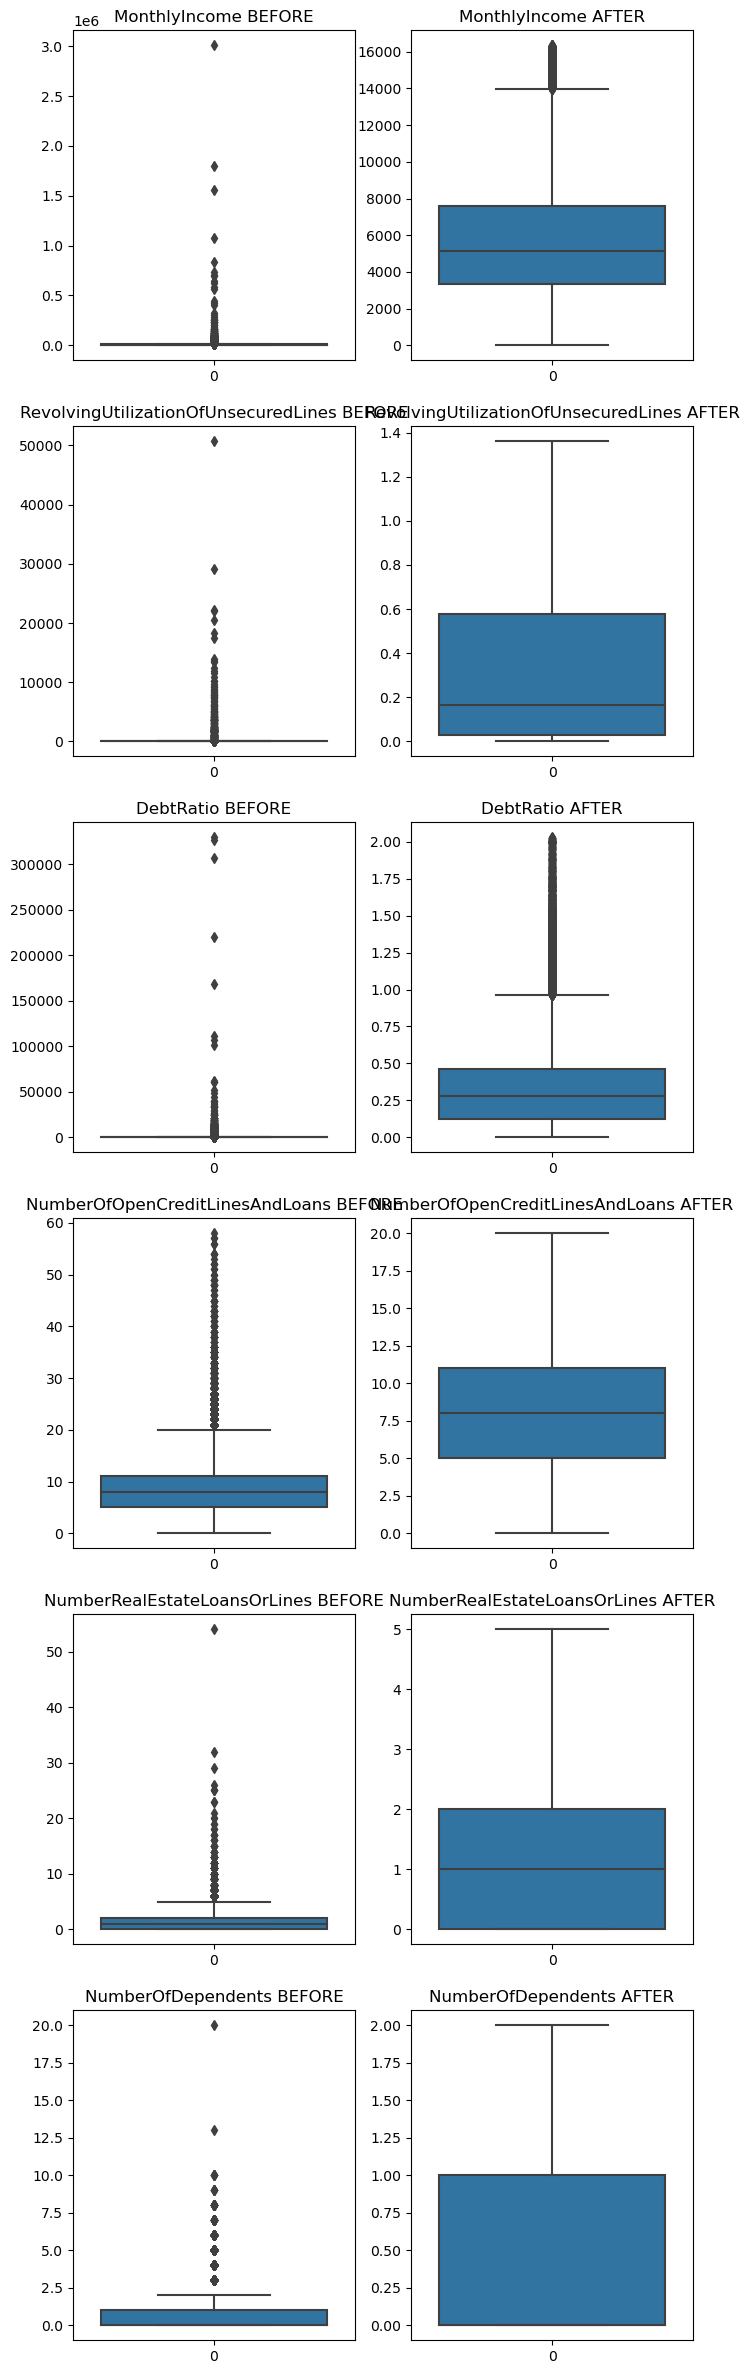

In [9]:
fig, axes = plt.subplots(len(list_outlier_cols),2, figsize=(8,30))
r0=0

for col in list_outlier_cols:
    sns.boxplot(data =df_fill[col],ax=axes[r0][0]).set(title=col+' BEFORE')
    sns.boxplot(data =df_nooutliers[col],ax=axes[r0][1]).set(title=col+' AFTER')
    r0=r0+1   

The following properties are processed manually after observation.

In [10]:
list_manua=['NumberOfTime30-59DaysPastDueNotWorse',
          'NumberOfTime60-89DaysPastDueNotWorse',
          'NumberOfTimes90DaysLate']
list_manua_label=['30-59Days','60-89Days','90+Days']

df_nooutliers= df_nooutliers[df_nooutliers['NumberOfTime30-59DaysPastDueNotWorse'] < 90]
df_nooutliers= df_nooutliers[df_nooutliers['NumberOfTime60-89DaysPastDueNotWorse'] < 90]
df_nooutliers= df_nooutliers[df_nooutliers['NumberOfTimes90DaysLate'] < 90]

df_nooutliers.reset_index(drop=True, inplace=True)
df_nooutliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99932 entries, 0 to 99931
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      99932 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  99932 non-null  float64
 2   age                                   99932 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  99932 non-null  int64  
 4   DebtRatio                             99932 non-null  float64
 5   MonthlyIncome                         99932 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       99932 non-null  int64  
 7   NumberOfTimes90DaysLate               99932 non-null  int64  
 8   NumberRealEstateLoansOrLines          99932 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  99932 non-null  int64  
 10  NumberOfDependents                    99932 non-null  float64
dtypes: float64(4), 


****************************************
Before manual processing.
****************************************


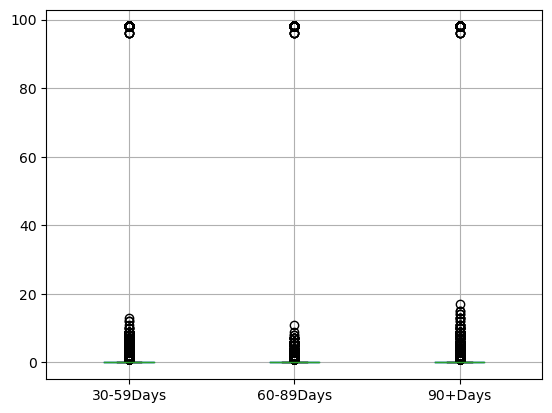


****************************************
After manual processing.
****************************************


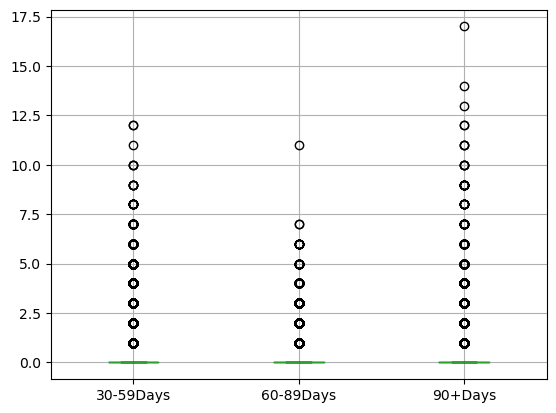

In [11]:
Separate('Before manual processing.')
df_fill[list_manua].boxplot()
plt.xticks([1,2,3],list_manua_label)
plt.show()

Separate('After manual processing.')
df_nooutliers[list_manua].boxplot()
plt.xticks([1,2,3],list_manua_label)
plt.show()

In [12]:
# the columns' names are too long, map them to shorter ones for displaying in plots
dict_namemap = {'SeriousDlqin2yrs':'Default',
                'RevolvingUtilizationOfUnsecuredLines':'RUofULine',
                'age':'age',
                'NumberOfTime30-59DaysPastDueNotWorse':'days_due30', 
                'DebtRatio':'DebtRatio', 
                'MonthlyIncome':'mIncome',
                'NumberOfOpenCreditLinesAndLoans':'nCredits', 
                'NumberOfTimes90DaysLate':'days_due90',
                'NumberRealEstateLoansOrLines':'nREloans', 
                'NumberOfTime60-89DaysPastDueNotWorse':'days_due60',
                'NumberOfDependents':'nDepend'  
}
df_nooutliers = df_nooutliers.rename(columns=dict_namemap)
df_nooutliers.head()

,Default,RUofULine,age,days_due30,DebtRatio,mIncome,nCredits,days_due90,nREloans,days_due60,nDepend
0,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
1,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
2,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
3,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
4,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0


## <font color=blue>Phase 2: Explore possible relationships

Because of its strong interpretability, the LR model is widely used in the financial industry.<br>
LR is used here to fit 10 known attributes and 1 classification result label. For the 2-element classification results, the use of WOE and IV indicators for attribute value selection and processing has a better effect.<br>
1. WOE describes the relationship between a predictive variable and a binary target variable.<br>
2. IV measures the strength of that relationship.

<span style="color:#009999">
The weight of evidence (WOE) tells the predictive power of an independent variable in relation to the dependent variable. Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers. <br>
Information value (IV) is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance. <br>

| Information Value| Variable Predictiveness|
|  :----:  | :----:  |
|Less than 0.02	|Not useful for prediction|
|0.02 to 0.1	|Weak predictive Power|
|0.1 to 0.3	|Medium predictive Power|
|0.3 to 0.5	|Strong predictive Power|
|>0.5	|Suspicious Predictive Power|
    
    https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html
</span>

In [13]:
# define a function to calculate WOE of a column with n bins
# parameters:
# df: data source table
# label_col: the column of classification labels
# target_col: the column to be calulated 
# n: bins number, default valuse is 10
# return value:
# df_noouts: a datafram without outliers
def WOE_from_nbins(df, label_col, target_col, n = 10):
    df_attr = df[[target_col,label_col]].copy()
    df_attr['bucket']=pd.cut(df_attr[target_col],bins = n)
    df_woe = pd.DataFrame(df_attr.groupby(['bucket',label_col]).size().unstack())
    df_woe.columns=['good_0', 'bad_1']
    
    # in case some cells equals 0
    df_woe.loc[df_woe['good_0']==0,['good_0']]=0.5
    df_woe.loc[df_woe['bad_1']==0, ['bad_1']]=0.5
    
    df_woe['bucket_size'] = df_woe['good_0']+df_woe['bad_1']
    sum_good0 = df_woe['good_0'].sum()
    sum_bad1 = df_woe['bad_1'].sum()
    df_woe['good_0_rate']=df_woe['good_0']/sum_good0
    df_woe['bad_1_rate']=df_woe['bad_1']/sum_bad1
    df_woe['woe'] = np.log(df_woe['bad_1_rate']/df_woe['good_0_rate'])
    iv=(( df_woe['bad_1_rate']-df_woe['good_0_rate'])*df_woe['woe']).sum()
    
    # The WOE value will be written back to df, for LR model optimisation.
    woeColname = target_col+'_woe'
    df_attr = pd.merge(df_attr,df_woe['woe'], how='left', on='bucket')
    df[woeColname] = df_attr['woe']
    
    return iv,df_woe

# define a function to calculate WOE of a column with specified bin list
# parameters:
# df: data source table
# label_col: the column of classification labels
# target_col: the column to be calulated 
# list_bin: bins defined by a list
# return value:
# df_noouts: a datafram without outliers
def WOE_from_specbins(df, label_col, target_col, list_bin):
    df_attr = df[[target_col,label_col]].copy()
    df_attr['bucket']=pd.cut(df_attr[target_col],bins = list_bin)
    df_woe = pd.DataFrame(df_attr.groupby(['bucket',label_col]).size().unstack())
    df_woe.columns=['good_0', 'bad_1']
    
    # in case some cells equals 0
    df_woe.loc[df_woe['good_0']==0,['good_0']]=0.5
    df_woe.loc[df_woe['bad_1']==0, ['bad_1']]=0.5
    
    df_woe['bucket_size'] = df_woe['good_0']+df_woe['bad_1']
    sum_good0 = df_woe['good_0'].sum()
    sum_bad1 = df_woe['bad_1'].sum()
    df_woe['good_0_rate']=df_woe['good_0']/sum_good0
    df_woe['bad_1_rate']=df_woe['bad_1']/sum_bad1
    df_woe['woe'] = np.log(df_woe['bad_1_rate']/df_woe['good_0_rate'])
    iv=(( df_woe['bad_1_rate']-df_woe['good_0_rate'])*df_woe['woe']).sum()
    
    # The WOE value will be written back to df, for LR model optimisation.
    woeColname = target_col+'_woe'
    df_attr = pd.merge(df_attr,df_woe['woe'], how='left', on='bucket')
    df[woeColname] = df_attr['woe']
    return iv,df_woe

In [14]:
#An example of caculating WOE, IV of 'RevolvingUtilizationOfUnsecuredLines' by WOE_from_nbins
df_iv = df_nooutliers.copy()

target_col = 'age'
label_col = 'Default'
iv,df1 = WOE_from_nbins(df_iv,label_col, target_col)
print('iv = {}'.format(iv))
print('WOE table = ')
print(df1)

iv = 0.21697589452591645
WOE table = 
                 good_0   bad_1  bucket_size  good_0_rate  bad_1_rate  \
bucket                                                                  
(-0.105, 10.5]      1.0     0.5          1.5     0.000011    0.000077   
(10.5, 21.0]      120.0     3.0        123.0     0.001284    0.000462   
(21.0, 31.5]     8909.0  1034.0       9943.0     0.095345    0.159261   
(31.5, 42.0]    17635.0  1729.0      19364.0     0.188731    0.266307   
(42.0, 52.5]    20666.0  1730.0      22396.0     0.221169    0.266461   
(52.5, 63.0]    23767.0  1395.0      25162.0     0.254356    0.214863   
(63.0, 73.5]    13804.0   405.0      14209.0     0.147731    0.062380   
(73.5, 84.0]     6887.0   159.0       7046.0     0.073705    0.024490   
(84.0, 94.5]     1583.0    35.0       1618.0     0.016941    0.005391   
(94.5, 105.0]      68.0     2.0         70.0     0.000728    0.000308   

                     woe  
bucket                    
(-0.105, 10.5]  1.973525  
(10.

In [15]:
#An example of caculating WOE, IV of 'NumberOfTime30-59DaysPastDueNotWorse' by WOE_from_specbins
df_iv = df_nooutliers.copy()

target_col = 'days_due30'
label_col = 'Default'
list_bin = [float('-inf'), 0, 1, 3, 5, float('inf')]
iv,df1 = WOE_from_specbins(df_nooutliers, label_col, target_col, list_bin)
print('iv = {}'.format(iv))
print('WOE table = ')
print(df1)

iv = 0.6980064853716543
WOE table = 
              good_0   bad_1  bucket_size  good_0_rate  bad_1_rate       woe
bucket                                                                      
(-inf, 0.0]  80739.0  3372.0      84111.0     0.864073    0.519409 -0.508967
(0.0, 1.0]    9220.0  1527.0      10747.0     0.098673    0.235213  0.868679
(1.0, 3.0]    3014.0  1208.0       4222.0     0.032256    0.186075  1.752447
(3.0, 5.0]     392.0   316.0        708.0     0.004195    0.048675  2.451229
(5.0, inf]      75.0    69.0        144.0     0.000803    0.010628  2.583367


     col_name        IV
0   RUofULine  1.027894
1         age  0.216976
2   DebtRatio  0.076702
3     mIncome  0.081281
4  days_due30  0.698006
5    nCredits  0.053903
6  days_due90  0.807356
7    nREloans  0.031808
8  days_due60  0.525405
9     nDepend  0.026387


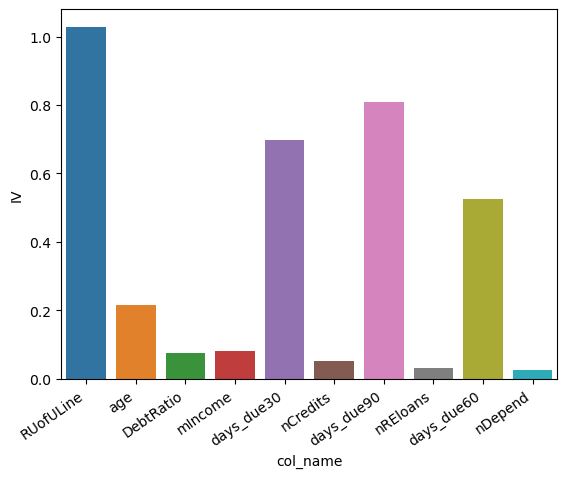

In [16]:
# Some of columns are 10 bins, some are manually binned.
df_iv = df_nooutliers.copy()

df_iv1=pd.DataFrame(columns=['col_name','IV'])
list_10bins = ['RUofULine','age','DebtRatio','mIncome']
label_col = 'Default'

for col in list_10bins:
    iv,df1 = WOE_from_nbins(df_iv,label_col, col)
    t1 = pd.DataFrame([col,iv]).T
    t1.columns = df_iv1.columns
    
    df_iv1 = pd.concat([df_iv1,t1], axis=0, ignore_index=True)

list_manucolumsn = ['days_due30', 'nCredits', 'days_due90', 'nREloans', 'days_due60', 'nDepend']
list_manubins=[[float('-inf'), 0, 1, 3, 5, float('inf')],
              [float('-inf'), 1, 2, 3, 5, float('inf')],
              [float('-inf'), 0, 1, 3, 5, float('inf')],
              [float('-inf'), 0,1,2, 3, float('inf')],
              [float('-inf'), 0, 1, 3, float('inf')],
              [float('-inf'), 0, 1, 2, 3, 5, float('inf')]]

for i in range(len(list_manucolumsn)):
    iv,df1 = WOE_from_specbins(df_iv,label_col, list_manucolumsn[i], list_manubins[i])
    t1 = pd.DataFrame([list_manucolumsn[i],iv]).T
    t1.columns = df_iv1.columns
    
    df_iv1 = pd.concat([df_iv1,t1], axis=0, ignore_index=True)

print(df_iv1)
g = sns.barplot(x='col_name', y='IV', data=df_iv1)
plt.xticks(rotation=35, ha='right')
plt.show()

<span style="color:red">
The columns of 'RUofUline', 'age', 'days_due30','days_due60' and 'days_due90' hold IV greater than 0.2.<br>
They are key factors to predict whether default or not, and to caculate a credit score.
</span>

##  <font color=blue>Phase 3: Dataset Split</font>

In [17]:
df_iv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99932 entries, 0 to 99931
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Default         99932 non-null  int64  
 1   RUofULine       99932 non-null  float64
 2   age             99932 non-null  int64  
 3   days_due30      99932 non-null  int64  
 4   DebtRatio       99932 non-null  float64
 5   mIncome         99932 non-null  float64
 6   nCredits        99932 non-null  int64  
 7   days_due90      99932 non-null  int64  
 8   nREloans        99932 non-null  int64  
 9   days_due60      99932 non-null  int64  
 10  nDepend         99932 non-null  float64
 11  days_due30_woe  99932 non-null  float64
 12  RUofULine_woe   99932 non-null  float64
 13  age_woe         99932 non-null  float64
 14  DebtRatio_woe   99932 non-null  float64
 15  mIncome_woe     99932 non-null  float64
 16  nCredits_woe    99932 non-null  float64
 17  days_due90_woe  99932 non-null 

In [18]:
# define a function to get the most frequently used metrics
# parameters:
# y: the actual y of test set 
# y_pred: the predicted y from mode
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, \
                            confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

def res_output(y, y_pred, wid=6, heit=4):
    print('Confusion Matrix:')
    print(confusion_matrix(y, y_pred),'\n')
    print('Accaracy:{:0.4%}'.format(accuracy_score(y, y_pred)))
    print('Precsion:{:0.4%}'.format(precision_score(y, y_pred)))
    print('Recall:{:0.4%}'.format(recall_score(y, y_pred)))
    print('F1:{:0.4%}'.format(f1_score(y, y_pred)))
    print('AUC:{:0.4%}'.format(roc_auc_score(y, y_pred)))
    fpr, tpr, threshould = roc_curve(y, y_pred)
    plt.figure(figsize=(wid,heit))
    plt.plot(fpr,tpr,'b')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel('TPR')
    plt.xlabel('FTR')
    plt.show()

In [19]:
#测试集与训练集生成
from sklearn.model_selection import train_test_split
#SeriousDlqin2yrs原始值为0表示正常，为1表示违约
#而习惯上信用评分越高的，违约可能越小
#因此将该值转置，原值0的，置为1；原值1的，置为0
df_iv['Default']=1-df_iv['Default']
Y = df_iv['Default']
X = df_iv.drop(['Default'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

print("df.shape:",df_iv.shape)
print("X_train:",X_train.shape)
print("y_train:",y_train.shape)
print("X_test:",X_test.shape)
print("y_test:",y_test.shape)

list_oriCol = ['RUofULine', 'age', 'days_due30','days_due60', 'days_due90']
list_woeCol = ['RUofULine_woe', 'age_woe', 'days_due30_woe','days_due60_woe', 'days_due90_woe']

df.shape: (99932, 21)
X_train: (69952, 20)
y_train: (69952,)
X_test: (29980, 20)
y_test: (29980,)


## <font color=blue>Phase 4: Model training

Confusion Matrix:
[[  309  1670]
 [  214 27787]] 

Accaracy:93.7158%
Precsion:94.3307%
Recall:99.2357%
F1:96.7211%
AUC:57.4248%


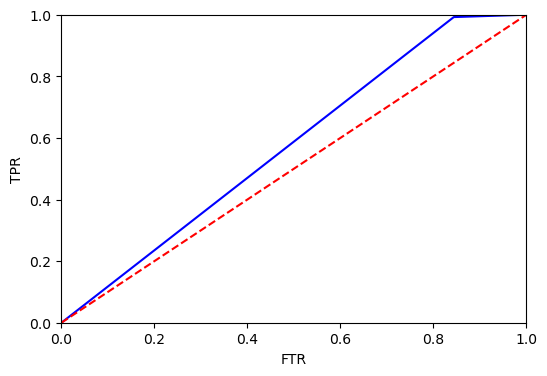

Coefficiencies for RUofULine, age, days_due30, days_due60, days_due90 are: [-1.82924272  0.01359901 -0.48251683 -0.64832255 -0.66132924]
Interception is: [3.3292142]


In [20]:
# logistics regression with original data
from sklearn.linear_model import LogisticRegression

lrmodel=LogisticRegression(solver='liblinear')  
lrmodel.fit(X_train[list_oriCol],y_train)  

y_lrpred=lrmodel.predict(X_test[list_oriCol]) 

res_output(y_test, y_lrpred)  
print('Coefficiencies for RUofULine, age, days_due30, days_due60, days_due90 are: {}'.format(lrmodel.coef_[0]))
print('Interception is: {}'.format(lrmodel.intercept_))

Confusion Matrix:
[[  351  1628]
 [  235 27766]] 

Accaracy:93.7859%
Precsion:94.4615%
Recall:99.1607%
F1:96.7541%
AUC:58.4485%


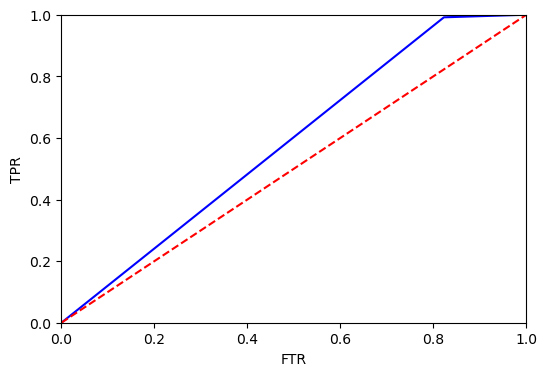

Coefficiencies for RUofULine_woe, age_woe, days_due30_woe, days_due60_woe, days_due90_woe are: [-0.64132886 -0.44626657 -0.56259964 -0.41935443 -0.53820448]
Interception is: [2.64433326]


In [21]:
# logistics regression with WOE data

lrmodel_woe=LogisticRegression(solver='liblinear')  
lrmodel_woe.fit(X_train[list_woeCol],y_train)  

y_lrwoepred=lrmodel_woe.predict(X_test[list_woeCol]) 

res_output(y_test, y_lrwoepred)  
print('Coefficiencies for RUofULine_woe, age_woe, days_due30_woe, days_due60_woe, days_due90_woe are: {}'.format(lrmodel_woe.coef_[0]))
print('Interception is: {}'.format(lrmodel_woe.intercept_))

# <font color=blue>Phase 5: Scoring

For Logistics regression for credit scoring, we use Equation 1 (which is a variation of Equation 2).<br>
$$f(x) = ln \frac{P_{good}}{P_{bad}}= ln \frac{y_{good}}{1-y_{good}} =\sum{(b_i*x_i)} + a\tag{1}$$
$$y = \frac{1}{1+e^{-f(x)}}\tag{2}$$ 
When we want the benchmark for a credit score to be 650, the customer with that score is ultimately a good/bad ratio of 50/1. When the score changes by 30, the good/bad ratio doubles.<br>
We want to scale f(x), and when the ratio is 50/1, f(x) can take a value of 650. When the ratio increases to 100/1, f(x) can take a value of 680.<br>
$$ f(x)*factor+offset = ln\frac{y_{good}}{1-y_{good}}*factor+offset = ln50*factor+offset = 650 \tag{3}$$ 
$$ ln100*factor+offset = 680 \tag{4}$$ 
Then, we get the factor and offset to scale f(x):
$$ factor = \frac{30}{ln(2)}$$
$$ offset = 650-factor*ln(50)$$

In [22]:
factor = 30/np.log(2)
offset = 650 - factor*np.log(50)

df_iv['score'] = 0
for i in range(len(list_woeCol)):
    df_iv['score'] = df_iv[list_woeCol[i]]*lrmodel_woe.coef_[0][i] + df_iv['score']

df_iv['score'] = df_iv['score'] + lrmodel_woe.intercept_
df_iv['score']=    df_iv['score']*factor + offset

In [23]:
Separate('Statistic description of customers:')
table1 = pd.DataFrame(data=df_iv[df_iv['Default']==1]['score'].describe())
table1.rename(columns={'score':'Normal'}, inplace=True)

table2 = pd.DataFrame(data=df_iv[df_iv['Default']==0]['score'].describe())
table2.rename(columns={'score':'Default'}, inplace=True)

table = pd.concat([table1,table2], axis=1)
table


****************************************
Statistic description of customers:
****************************************


,Normal,Default
count,93440.000000,6492.000000
mean,628.079585,550.021094
std,42.041914,67.030011
min,371.416173,341.624662
25%,605.038148,503.459933
50%,642.160493,555.008051
75%,659.205217,599.664202
max,678.062743,678.062743


<span style="color:red">
The scoring results for the two groups of customers differed significantly in mean, standard deviation, and quantiles.<br>
It can be considered that this scoring model has a good degree of differentiation between the two types of customers.
</span>

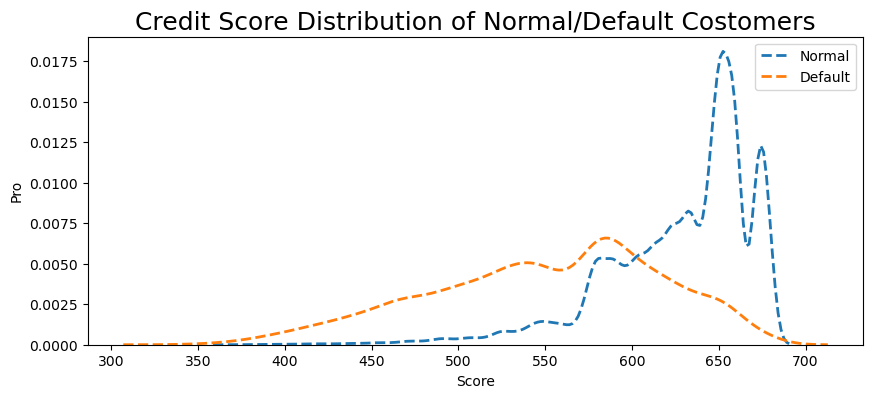

In [24]:
import seaborn as sns

plt.figure(figsize=(10,4))
sns.kdeplot(df_iv[df_iv['Default']==1]['score'],label='Normal',linewidth=2,linestyle='--')
sns.kdeplot(df_iv[df_iv['Default']==0]['score'],label='Default',linewidth=2,linestyle='--')

plt.xlabel('Score',fontdict={'size':10})
plt.ylabel('Pro',fontdict={'size':10})
plt.legend()
plt.title('Credit Score Distribution of Normal/Default Costomers',fontdict={'size':18})
plt.show()

## <font color=blue>Phase 6: Summary and Conclusion</font>

1. Missing value filling itself can be a data analytics task, and Sklearn provides tools for this purpose.
2. In some cases, data point outliers were severe.
3. For discrete classification labels, WOE can observe whether the jump between levels of attribute is linear in the improvement of odds, while IV can measure the predictive power of the variable as a whole (rather than each level).